# MAIN QUESTION/GOAL
The goal is to provide insights and strategic recommendations for stakeholders in the real estate sector.


## Exploratory Analysis

## Intro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer  # for Imputation with missing data
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [ ]:
# Kaggle Dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data
# to download !kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset
# to unzip the file: unzip usa-real-estate-dataset.zip

org_df = pd.read_csv('/content/realtor-data.zip.csv')
org_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


### Data Understanding

In [ ]:
org_df.shape

(1564693, 12)

In [ ]:
org_df.isna().sum().sum()

2334263

In [ ]:
dropped_df = org_df.dropna()

In [ ]:
dropped_df.isna().sum().sum()

0

In [ ]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564693 entries, 0 to 1564692
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1563071 non-null  float64
 1   status          1564693 non-null  object 
 2   price           1563386 non-null  float64
 3   bed             1146295 non-null  float64
 4   bath            1123622 non-null  float64
 5   acre_lot        1320663 non-null  float64
 6   street          1555649 non-null  float64
 7   city            1563384 non-null  object 
 8   state           1564685 non-null  object 
 9   zip_code        1564401 non-null  float64
 10  house_size      1081809 non-null  float64
 11  prev_sold_date  830395 non-null   object 
dtypes: float64(8), object(4)
memory usage: 143.3+ MB


In [ ]:
org_df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.563071e+06,1.563386e+06,1.146295e+06,1.123622e+06,1.320663e+06,1.555649e+06,1.564401e+06,1.081809e+06
mean,5.257908e+04,5.423906e+05,3.329198e+00,2.552317e+00,1.832364e+01,1.038394e+06,4.714246e+04,3.147882e+03
std,3.055459e+04,2.496248e+06,1.690864e+00,1.866459e+00,8.272511e+02,5.971553e+05,2.871066e+04,1.000465e+06
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.383300e+04,1.495000e+05,3.000000e+00,2.000000e+00,1.600000e-01,5.217160e+05,2.314100e+04,1.320000e+03
50%,5.277300e+04,3.199000e+05,3.000000e+00,2.000000e+00,3.100000e-01,1.043846e+06,3.835100e+04,1.803000e+03
75%,7.906800e+04,5.500000e+05,4.000000e+00,3.000000e+00,1.190000e+00,1.567918e+06,7.549700e+04,2.500000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


### Data Preperation

In [ ]:
org_df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [ ]:
# Brokered by:
# Reason for Removal: This column is categorically encoded, which means the actual names of the agencies or brokers are not provided. If the encoding does not offer a clear, interpretable categorization or if the encoded values are too numerous to analyze meaningfully, it might not add value to your analysis.
# Impact: Removing this could simplify your dataset without losing critical information about the property characteristics that directly influence price and other key metrics.
# Street:
# Reason for Removal: Like 'brokered by', the street addresses are categorically encoded. This level of granularity is often not necessary for high-level real estate market analyses, especially if you are focusing on trends by city, state, or zip code.
# Impact: Eliminating this column helps focus the analysis on broader trends without getting bogged down by overfitting to highly specific locations that are not actionable at a strategic level.
# Prev_sold_date:
# Reason for Removal: Not directly relevant unless focusing on temporal trends.

org_df.drop(['brokered_by', 'street', 'prev_sold_date'],axis = 1, inplace=True)

org_df.rename(columns={
    'acre_lot': 'lot_size_acres',  # More descriptive
    'house_size': 'living_area_sq_ft',  # Clarify the measurement unit
}, inplace=True)

org_df.head()

,status,price,bed,bath,lot_size_acres,city,state,zip_code,living_area_sq_ft
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN


In [ ]:
org_df.state.unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware', 'Louisiana', 'Ohio', 'California', 'Colorado',
       'Maryland', 'Missouri', 'District of Columbia', 'Wisconsin',
       'North Carolina', 'Kentucky', 'Michigan', 'Mississippi', 'Florida',
       'Alabama', 'New Brunswick', nan, 'Texas', 'Arkansas', 'Idaho',
       'Indiana', 'Illinois', 'New Mexico', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Oklahoma',
       'Kansas', 'Oregon', 'Utah', 'Nevada', 'Washington', 'Arizona',
       'Hawaii', 'Guam', 'Alaska'], dtype=object)

In [ ]:
df = org_df.copy()

##### Handle Missing Values

In [ ]:
# The dataset looks good, but the amount of missing data is concerning, we could use strategy for it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564693 entries, 0 to 1564692
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   status             1564693 non-null  object 
 1   price              1563386 non-null  float64
 2   bed                1146295 non-null  float64
 3   bath               1123622 non-null  float64
 4   lot_size_acres     1320663 non-null  float64
 5   city               1563384 non-null  object 
 6   state              1564685 non-null  object 
 7   zip_code           1564401 non-null  float64
 8   living_area_sq_ft  1081809 non-null  float64
dtypes: float64(6), object(3)
memory usage: 107.4+ MB


In [ ]:
df.shape


(1564693, 9)

In [ ]:
# Display statistical summaries to compare the impact of deleting missing values versus keeping them
# The first summary shows data after deletion of rows with missing values, highlighting potential data loss and its impact.
# The second summary displays the original data's statistics, allowing for a comparison to see how deletion could significantly alter data characteristics.
display(org_df.describe()), display(org_df.dropna().describe())


,price,bed,bath,lot_size_acres,zip_code,living_area_sq_ft
count,1.563386e+06,1.146295e+06,1.123622e+06,1.320663e+06,1.564401e+06,1.081809e+06
mean,5.423906e+05,3.329198e+00,2.552317e+00,1.832364e+01,4.714246e+04,3.147882e+03
std,2.496248e+06,1.690864e+00,1.866459e+00,8.272511e+02,2.871066e+04,1.000465e+06
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.495000e+05,3.000000e+00,2.000000e+00,1.600000e-01,2.314100e+04,1.320000e+03
50%,3.199000e+05,3.000000e+00,2.000000e+00,3.100000e-01,3.835100e+04,1.803000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,1.190000e+00,7.549700e+04,2.500000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


,price,bed,bath,lot_size_acres,zip_code,living_area_sq_ft
count,8.577960e+05,857796.000000,857796.000000,857796.000000,857796.000000,8.577960e+05
mean,6.038688e+05,3.463095,2.612675,15.971026,48632.915466,2.226158e+03
std,1.441312e+06,1.530890,1.478295,893.042344,29623.282860,5.085970e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.390000e+05,3.000000,2.000000,0.140000,21787.750000,1.393000e+03
50%,3.830000e+05,3.000000,2.000000,0.230000,44026.000000,1.867000e+03
75%,6.199000e+05,4.000000,3.000000,0.530000,77306.000000,2.584000e+03
max,5.150000e+08,444.000000,222.000000,100000.000000,99999.000000,1.560780e+06


(None, None)

In [ ]:
print("Shape of org df:", org_df.dropna().shape,"\nVS","\nShape of org df with dropped Nan rows:",org_df.dropna().shape) #Huge data loss if we did this

Shape of org df: (857796, 9) 
VS 
Shape of org df with dropped Nan rows: (857796, 9)


In [ ]:
# Handle Missing Values
# Check for missing values and decide on a strategy (imputation or deletion):

# I will go with imputation because:
# imputation preserves crucial data and prevents the introduction of bias
# that could result from dropping rows with missing values, ensuring analyses remain robust and representative.

df.isna().sum()

# Imputer for continuous variables using the median
# The median is less sensitive to outliers than the mean, which is important for skewed data like prices and sizes:
# - 'price': Real estate prices can be highly skewed with some very high values; the median avoids the skewing effect of these outliers.
# - 'acre_lot' and 'house_size': Similar to price, the size of properties can vary greatly, and using the median helps to represent the most typical value without the distortion from very large or very small properties.
# - 'zip_code': since only a small percentage is missing, mode imputation is a safe
median_imputer = SimpleImputer(strategy='median')
df['price'] = median_imputer.fit_transform(df[['price']])
df['lot_size_acres'] = median_imputer.fit_transform(df[['lot_size_acres']])
df['living_area_sq_ft'] = median_imputer.fit_transform(df[['living_area_sq_ft']])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])


# Imputer for categorical variables using the most frequent (mode)
# The mode is generally used for categorical data to fill in the most common category that appears in the dataset:
# - 'city', 'state': These are categorical variables where imputing the most common value (mode) maintains the distribution of data.
# It ensures that the imputed values are representative of the most likely occurrence.
city_mode = df['city'].mode()[0]
state_mode = df['state'].mode()[0]
df['city'] = df['city'].fillna(city_mode)
df['state'] = df['state'].fillna(state_mode)


# Imputation for 'bed' and 'bath' as they are discrete but numerical
# Using median here as well because these are typically whole numbers and the median will
# provide the middle value in the distribution:
# - 'bed' and 'bath': As counts of bedrooms and bathrooms, these fields are discrete numerical values. The median is appropriate because it is the central value in their distribution and is unaffected by extreme values.
df['bed'] = median_imputer.fit_transform(df[['bed']])
df['bath'] = median_imputer.fit_transform(df[['bath']])


In [ ]:
# As you can see, imputation was appropriate because it minimally affected our data.
# There were slight changes, but compared to deletion, which could lead to significant changes,
# imputation helps preserve the integrity and originality of our data.df.describe()
display(org_df.describe()), display(df.describe())


,price,bed,bath,lot_size_acres,zip_code,living_area_sq_ft
count,1.563386e+06,1.146295e+06,1.123622e+06,1.320663e+06,1.564401e+06,1.081809e+06
mean,5.423906e+05,3.329198e+00,2.552317e+00,1.832364e+01,4.714246e+04,3.147882e+03
std,2.496248e+06,1.690864e+00,1.866459e+00,8.272511e+02,2.871066e+04,1.000465e+06
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.495000e+05,3.000000e+00,2.000000e+00,1.600000e-01,2.314100e+04,1.320000e+03
50%,3.199000e+05,3.000000e+00,2.000000e+00,3.100000e-01,3.835100e+04,1.803000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,1.190000e+00,7.549700e+04,2.500000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


,price,bed,bath,lot_size_acres,zip_code,living_area_sq_ft
count,1.564693e+06,1.564693e+06,1.564693e+06,1.564693e+06,1.564693e+06,1.564693e+06
mean,5.422048e+05,3.241171e+00,2.396624e+00,1.551423e+01,4.714000e+04,2.732834e+03
std,2.495213e+06,1.454562e+00,1.601065e+00,7.600372e+02,2.870854e+04,8.318838e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.499000e+05,3.000000e+00,2.000000e+00,1.800000e-01,2.315000e+04,1.534000e+03
50%,3.199000e+05,3.000000e+00,2.000000e+00,3.100000e-01,3.834300e+04,1.803000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,9.500000e-01,7.549500e+04,2.139000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


(None, None)

In [ ]:
df.isna().sum()

status               0
price                0
bed                  0
bath                 0
lot_size_acres       0
city                 0
state                0
zip_code             0
living_area_sq_ft    0
dtype: int64

In [ ]:
#Checking for duplicated rows in your dataset is an important step in data cleaning, as duplicates can skew your analysis and lead to incorrect conclusions

# Identify all duplicates in the dataset
all_duplicates = df.duplicated(keep=False)

# Count all duplicates
print(f'Total number of duplicate rows (including all instances): {all_duplicates.sum()}')

df = df.drop_duplicates() # drop duplicates
print(f'Number of rows after removing duplicates: {df.shape[0]}')

df.shape

Total number of duplicate rows (including all instances): 111869
Number of rows after removing duplicates: 1495891


(1495891, 9)

## Feature Understaing: Numeric variables & Categorical variables

#### Numeric variables:

In [ ]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
display(descriptive_stats)

Observations from Descriptive Statistics of Real Estate Data:
1. The 'price' variable shows a significant range, with a maximum of over 2 billion, which suggests potential outliers or special property listings.
2. The 'bed' (bedrooms) and 'bath' (bathrooms) columns have unusually high max values (473 for bedrooms and 830 for bathrooms), indicating possible data entry errors or extreme cases.
3. The 'lot_size_acres' has a maximum of 100,000 acres, which is extraordinarily large for residential properties, pointing towards potential inclusion of commercial or agricultural land, or errors.
4. The 'living_area_sq_ft' also indicates extreme values with a maximum of over 1 billion square feet, highly unlikely for individual real estate properties and likely indicating data errors.
5. The standard deviation in 'price' and 'living_area_sq_ft' is considerably large, highlighting substantial variability in the dataset, which could affect modeling accuracy if not addressed (e.g., through log transformation or removing outliers).
6. The minimum values for 'price' and 'living_area_sq_ft' are 0, which may require further investigation to determine if these represent missing or placeholder values that need to be handled.


,price,bed,bath,lot_size_acres,zip_code,living_area_sq_ft
count,1.495891e+06,1.495891e+06,1.495891e+06,1.495891e+06,1.495891e+06,1.495891e+06
mean,5.562242e+05,3.252950e+00,2.407734e+00,1.591930e+01,4.700219e+04,2.774207e+03
std,2.545138e+06,1.479286e+00,1.630392e+00,7.766317e+02,2.888466e+04,8.507990e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.595000e+05,3.000000e+00,2.000000e+00,1.800000e-01,2.248500e+04,1.515000e+03
50%,3.250000e+05,3.000000e+00,2.000000e+00,3.100000e-01,3.813500e+04,1.803000e+03
75%,5.650000e+05,4.000000e+00,3.000000e+00,9.500000e-01,7.564700e+04,2.175000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


In [ ]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'lot_size_acres', 'city', 'state',
       'zip_code', 'living_area_sq_ft'],
      dtype='object')

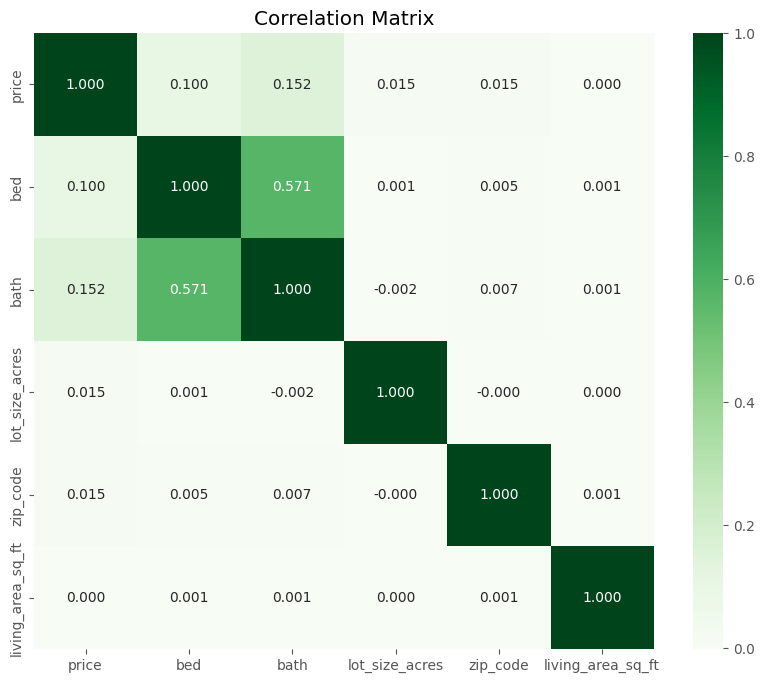

In [ ]:
numeric_columns = df[['price', 'bed', 'bath', 'lot_size_acres','zip_code', 'living_area_sq_ft']]

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".3f", cmap='Greens', cbar=True)
plt.title('Correlation Matrix')
plt.show()


# Analysis of Correlation Coefficients

# Price Relationships:
# Price and Bed: A correlation coefficient of 0.107 suggests a weak positive relationship.
# More bedrooms tend to increase property prices, but the effect is not very strong.

# Price and Bath: The correlation of 0.166 with bathrooms is slightly stronger than with bedrooms,
# indicating that properties with more bathrooms are likely to be priced higher.

# Price and Lot Size Acres: The very weak correlation of 0.014 suggests almost no linear
# relationship between the size of the lot and the price.

# Price and Living Area: Surprisingly, there is almost no correlation (0.000246) between the
# living area square footage and the price. This is unusual as larger living areas typically
# command higher prices.

# Bed and Bath: There is a moderate positive correlation of 0.581 between the number of bedrooms
# and bathrooms, which makes sense as larger homes typically have more of both.

# Lot Size, Zip Code, and Living Area:
# These variables show very low to negligible correlations with other features. Lot size acres and
# living area sq ft, particularly, show no meaningful correlations with price or other variables,
# which is atypical in real estate analysis.


<Axes: xlabel='price', ylabel='bath'>

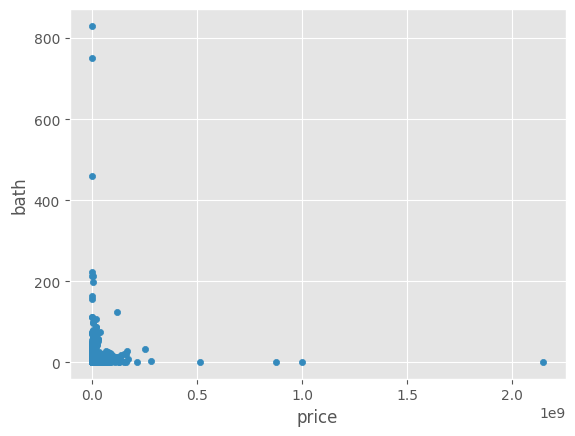

In [ ]:
# Scatter plot to visualize the relationship between price and number of bathrooms
# Comment: Displays a weak positive relationship where properties with more bathrooms tend to be priced higher, correlation coefficient = 0.166.
df.plot.scatter(x = 'price', y= 'bath' )


<Axes: xlabel='price', ylabel='bed'>

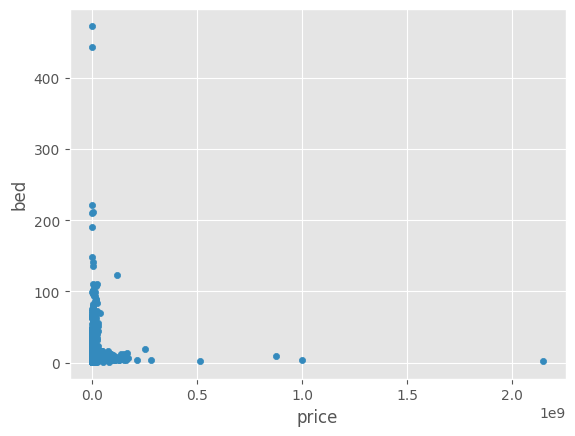

In [ ]:
# Scatter plot to visualize the relationship between price and number of bedrooms
# Comment: Shows a weak positive relationship, suggesting that an increase in bedrooms can slightly increase property prices, correlation coefficient = 0.107.
df.plot.scatter(x = 'price', y= 'bed' )

<Axes: xlabel='lot_size_acres', ylabel='zip_code'>

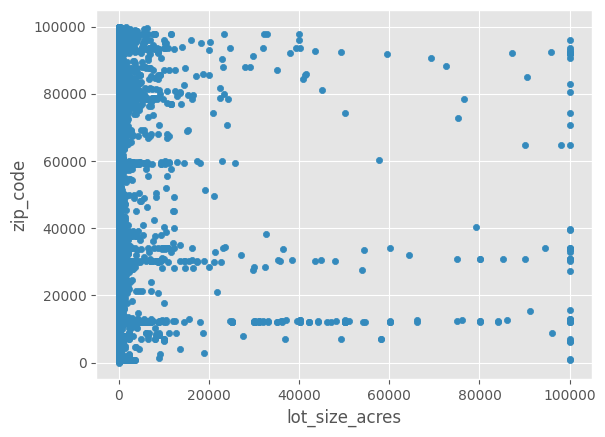

In [ ]:
# Scatter plot to visualize the relationship between lot size in acres and zip code
# Comment: The plot shows negligible correlation between lot size and zip code, correlation coefficient = -0.0015. Indicates that lot size doesn't vary systematically across zip codes.
df.plot.scatter(x = 'lot_size_acres', y= 'zip_code' )



<Axes: xlabel='price', ylabel='zip_code'>

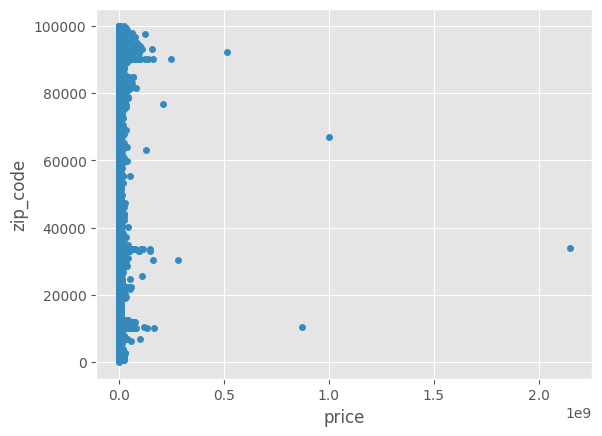

In [ ]:
# Scatter plot to visualize the relationship between price and zip code
# Comment: There appears to be a very weak relationship between the price and the zip code, correlation coefficient = 0.028. This indicates minimal influence of zip code on pricing.
df.plot.scatter(x = 'price', y= 'zip_code' )



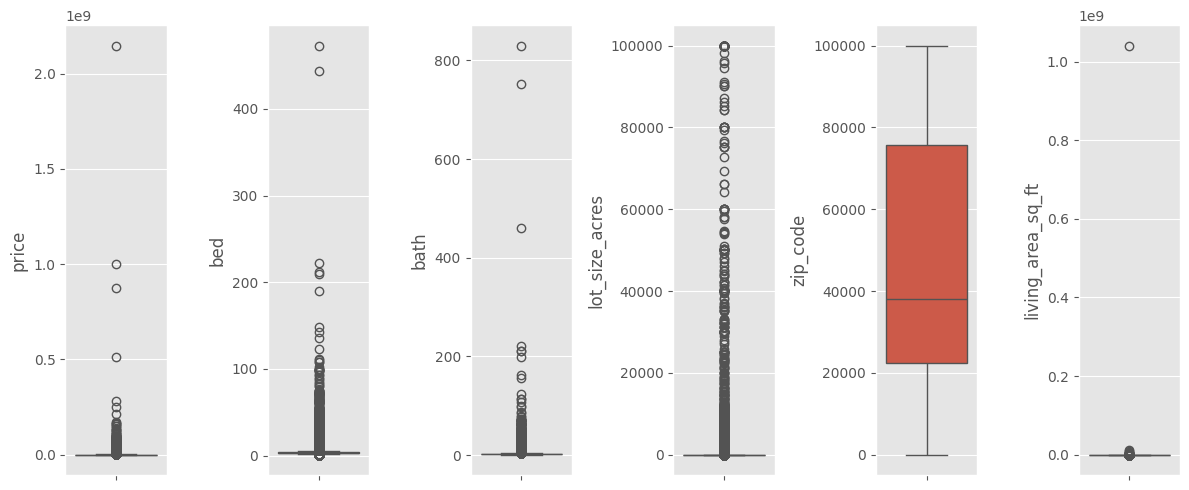

In [ ]:
numeric_columns = ['price', 'bed', 'bath', 'lot_size_acres','zip_code', 'living_area_sq_ft']
num_columns = len(numeric_columns)

plt.figure(figsize=(12, 5))
for i in range(num_columns):
  # chart in the subplot:
  plt.subplot(1, num_columns, i+1)

  # Plot the boxplot:
  sns.boxplot(y = df[numeric_columns[i]])

  # Optional: Instruct Matplotlib to make the chart use less space
  plt.tight_layout()


# Observations from Descriptive Statistics:

# 1. Price Distribution:
# - Mean price is $534,793 with a high standard deviation of $2,171,475, indicating a wide range in property prices.
# - The presence of extremely high max value ($2.15 billion) suggests outliers or luxury properties significantly skewing the distribution.

# 2. Bedrooms and Bathrooms:
# - Average numbers are 3.22 bedrooms and 2.39 bathrooms. Extremely high max values (473 bedrooms, 830 bathrooms) could indicate data errors or non-residential properties.
# - Median values (3 bedrooms, 2 bathrooms) reflect typical residential properties, but outliers suggest variability.

# 3. Lot Size:
# - Mean lot size is 13.29 acres, highly skewed with a max of 100,000 acres, indicating most properties have smaller lots, but a few very large properties skew the mean.

# 4. Zip Code:
# - Zip codes range appropriately from 0 to 99999, reflecting typical U.S. zip codes.

# 5. Living Area:
# - Average living area is about 2,496 sq ft, typical for family homes. An extraordinarily high max (1.04 billion sq ft) likely indicates data errors.

# Insights for Boxplot Visualizations:
# - Boxplots for price and living area would show long tails for higher values, confirming the presence of outliers or luxury properties.
# - Bedrooms and bathrooms distribution in boxplots would highlight the concentration around the median with extreme values indicating variability or data issues.



In [ ]:
df[df['bed'] > 100]

,status,price,bed,bath,lot_size_acres,city,state,zip_code,living_area_sq_ft
70245,for_sale,120000000.0,123.0,123.0,0.31,New York City,New York,10471.0,1803.0
156556,for_sale,2100000.0,142.0,2.0,0.10,Rochester,New York,14609.0,1545.0
401858,for_sale,575000.0,210.0,2.0,2.11,Cleveland,Tennessee,37311.0,6026.0
583135,for_sale,225000.0,473.0,157.0,0.31,Brent,Alabama,35034.0,1803.0
637336,for_sale,2100000.0,110.0,2.0,2.29,Memphis,Tennessee,38108.0,36250.0
637798,for_sale,5500000.0,136.0,2.0,4.71,Memphis,Tennessee,38127.0,1803.0
690428,for_sale,1499000.0,102.0,99.0,0.50,Dayton,Ohio,45405.0,7773.0
957227,for_sale,189000.0,190.0,163.0,3.57,New Orleans,Louisiana,70129.0,110350.0
1281369,for_sale,18000000.0,108.0,108.0,4.92,San Diego,California,92154.0,65960.0
1330664,for_sale,24898000.0,111.0,2.0,1.54,San Jose,California,95112.0,40796.0


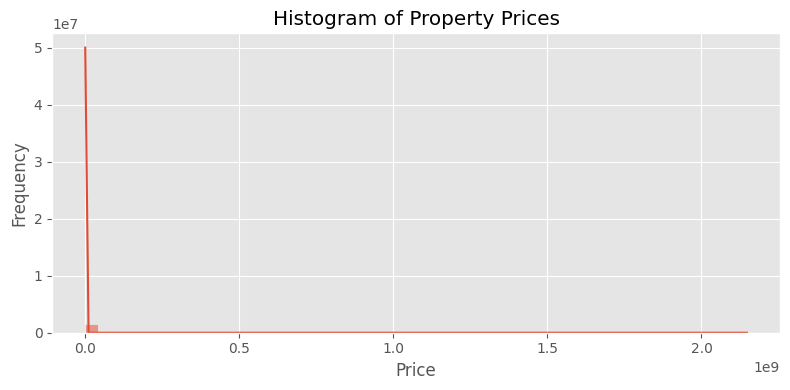

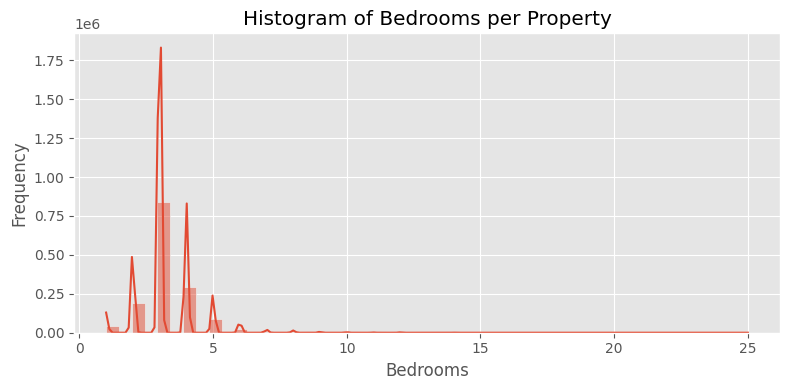

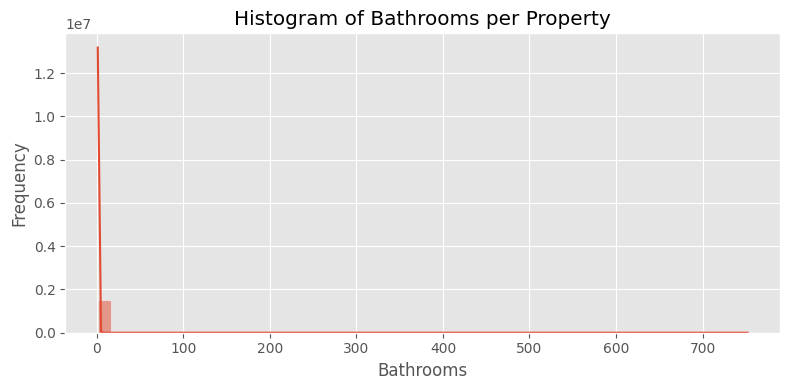

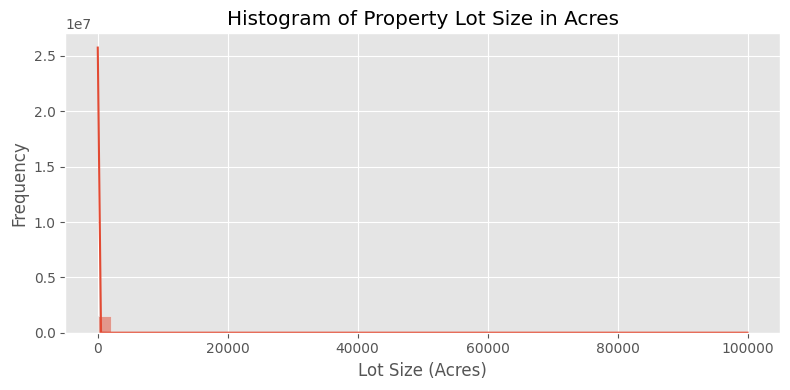

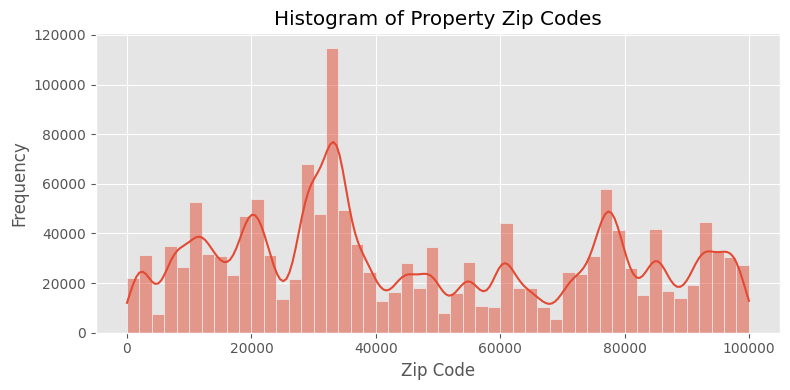

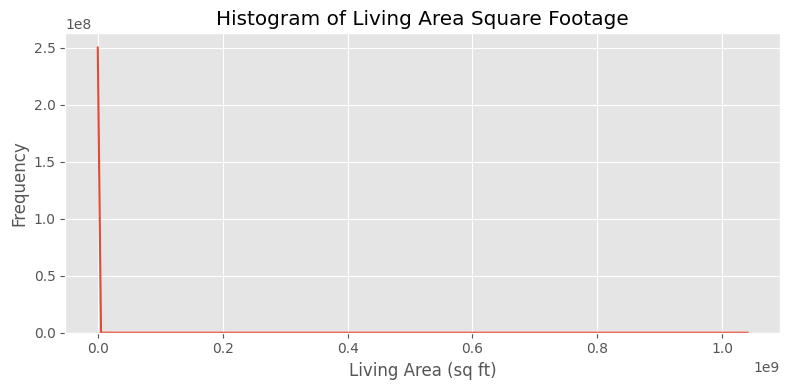

In [ ]:
# Histogram Analysis with Observations for Numeric Columns in Real Estate Data


# Assuming 'df' is your DataFrame containing the real estate data
numeric_columns = ['price', 'bed', 'bath', 'lot_size_acres', 'zip_code', 'living_area_sq_ft']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['bed'] <= 25][col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')

    # Display focused observations for each histogram
    if col == 'price':
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.title('Histogram of Property Prices')
        # Observation: Price is highly right-skewed with extreme outliers, suggesting luxury property influences.

    elif col == 'bed':
        plt.xlabel('Bedrooms')
        plt.ylabel('Frequency')
        plt.title('Histogram of Bedrooms per Property')
        # Observation: Bedrooms distribution is moderately skewed, few properties with very high bedroom counts.

    elif col == 'bath':
        plt.xlabel('Bathrooms')
        plt.ylabel('Frequency')
        plt.title('Histogram of Bathrooms per Property')
        # Observation: Similar to bedrooms, slightly right-skewed with occasional outliers in higher ranges.

    elif col == 'lot_size_acres':
        plt.xlabel('Lot Size (Acres)')
        plt.ylabel('Frequency')
        plt.title('Histogram of Property Lot Size in Acres')
        # Observation: Lot size shows extreme right skewness, most properties have small lots, few have very large ones.

    elif col == 'zip_code':
        plt.xlabel('Zip Code')
        plt.ylabel('Frequency')
        plt.title('Histogram of Property Zip Codes')

    elif col == 'living_area_sq_ft':
        plt.xlabel('Living Area (sq ft)')
        plt.ylabel('Frequency')
        plt.title('Histogram of Living Area Square Footage')
        # Observation: Living area is right-skewed; very large homes are rare but present as outliers.

    plt.tight_layout()
    plt.show()


#### Categorical variable

In [ ]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'lot_size_acres', 'city', 'state',
       'zip_code', 'living_area_sq_ft'],
      dtype='object')

Sale Status Distribution:


status
for_sale          1321436
sold               149453
ready_to_build      25002
Name: count, dtype: int64

--------------------
Sale Status Unique values:


array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

--------------------


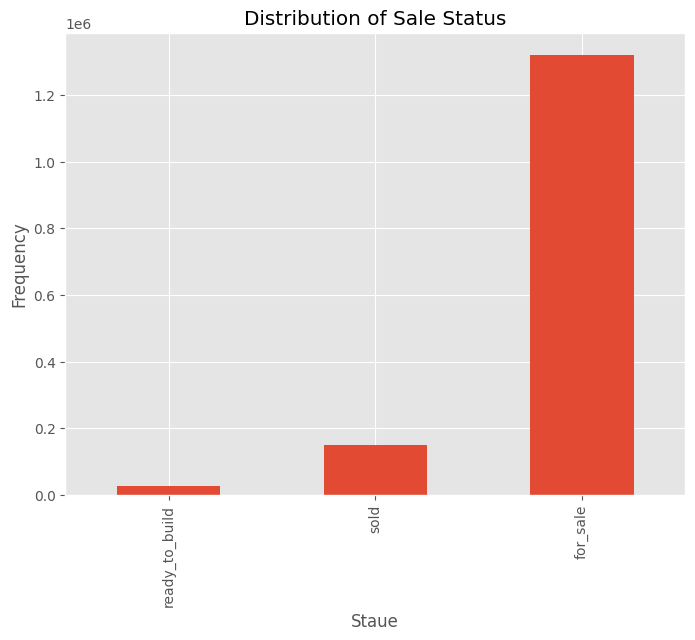

In [ ]:
# Check unique values and their frequency for 'status', 'city', 'state'
print("Sale Status Distribution:")
display(df['status'].value_counts())
print("-" * 20)

print("Sale Status Unique values:")
display(df['status'].unique())
print("-" * 20)


# Visualizing 'status'
plt.figure(figsize = (8,6))
df['status'].value_counts().sort_values().plot.bar()
plt.title('Distribution of Sale Status')
plt.xlabel('Staue')
plt.ylabel('Frequency')
plt.show()
# There seems to be more houses for sales and really small portion where house need to be build
Sale Status Distribution:
status
for_sale          1321436
sold               149453
ready_to_build      25002
Name: count, dtype: int64
--------------------
Sale Status Unique values:
array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

City Distribution (Top 20):
city
Chicago          13469
New York City    12307
Houston          10384
Philadelphia     10141
Washington        7757
San Antonio       7004
Baltimore         6222
Miami             6047
Brooklyn          5970
Jacksonville      5665
New York          5081
Naples            4503
Pittsburgh        4416
Los Angeles       4257
Springfield       3994
Atlanta           3649
Alexandria        3641
Lancaster         3629
Boston            3592
Rochester         3492
Name: count, dtype: int64
--------------------


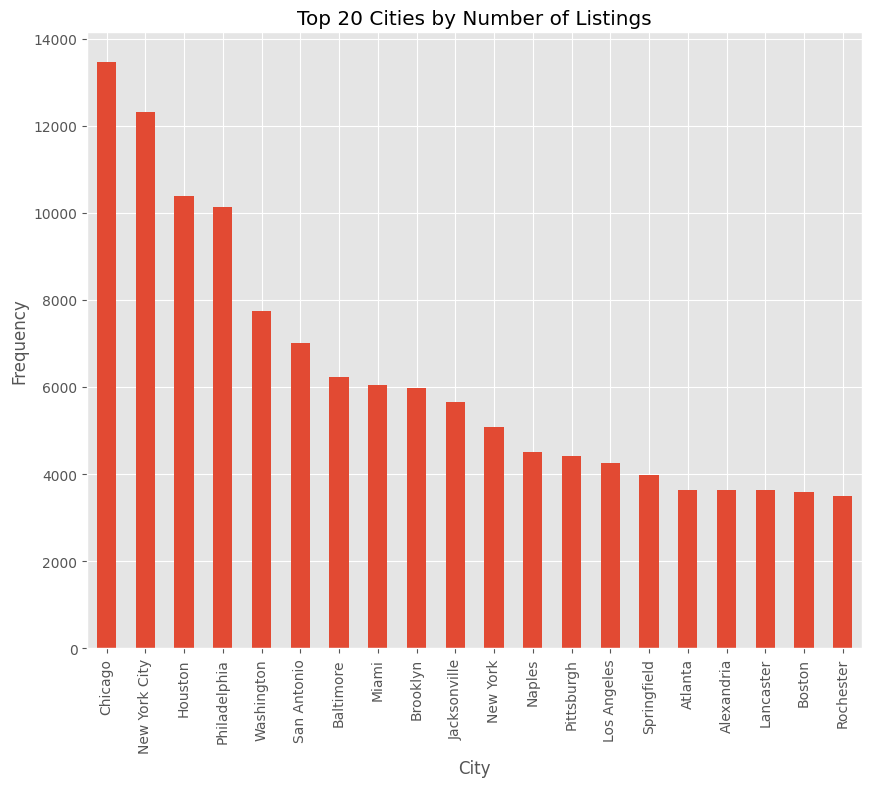

In [ ]:
# Check and visualize 'city' data
print("City Distribution (Top 20):")
print(df['city'].value_counts().head(20))  # Adjust column name if necessary
print("-" * 20)

plt.figure(figsize=(10, 8))
df['city'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Cities by Number of Listings')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

State Distribution:
state
Florida                 150325
Texas                   121654
New York                101045
California              100375
Pennsylvania             76933
North Carolina           55663
Illinois                 51509
Georgia                  48093
New Jersey               47423
Virginia                 47389
Maryland                 39614
Ohio                     38882
Massachusetts            37688
Arizona                  37352
Michigan                 34590
Tennessee                34351
South Carolina           30039
Missouri                 28675
Colorado                 26318
Alabama                  25334
Washington               24846
Minnesota                23976
Wisconsin                22554
Louisiana                21534
Oregon                   19803
Kentucky                 18555
Oklahoma                 18240
Indiana                  17901
Arkansas                 17339
Mississippi              13889
Connecticut              13783
Utah         

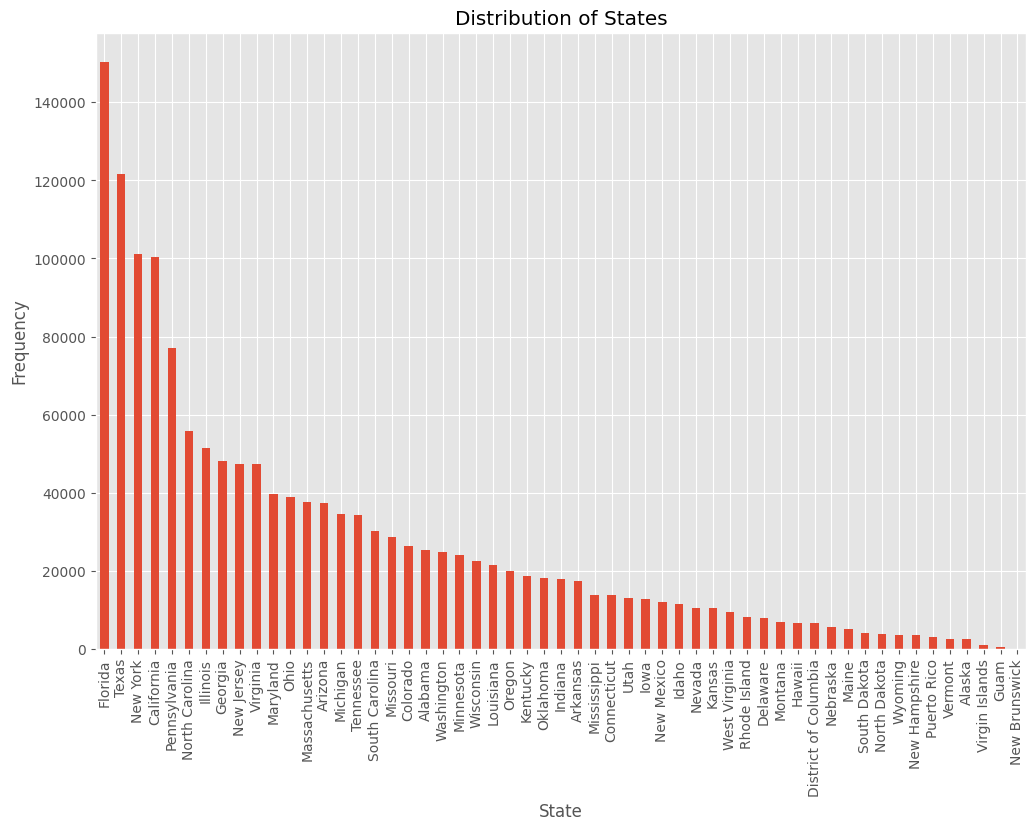

In [ ]:

# Check and visualize 'state' data
print("State Distribution:")
print(df['state'].value_counts())  # Adjust column name if necessary
print("-" * 20)

plt.figure(figsize=(12, 8))
df['state'].value_counts().plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.to_csv("preprocessed_data.csv")

In [ ]:
df

,status,price,bed,bath,lot_size_acres,city,state,zip_code,living_area_sq_ft
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,1803.0
...,...,...,...,...,...,...,...,...,...
1564688,sold,515000.0,5.0,3.0,0.23,Centreville,Maryland,21617.0,3030.0
1564689,sold,192000.0,4.0,2.0,0.03,Edgewood,Maryland,21040.0,1685.0
1564690,sold,285000.0,2.0,2.0,1.46,Joppa,Maryland,21085.0,1290.0
1564691,sold,375000.0,4.0,3.0,0.23,Baltimore,Maryland,21236.0,1958.0
